В этом задании вам предстоит выбрать любимый роман или книгу из предложенных по
ссылкам (https://github.com/nevmenandr/word2vec-russian-novels/tree/master/books_before),
либо использовать любой другой текст на ваше усмотрение, и натренировать свою
модель Word2Vec на выбранном тексте. Ваша задача — продемонстрировать понимание
процесса обучения модели и провести анализ результатов.
* Этапы выполнения задания:
    1. Выбор текста: Выберите текст для обучения модели Word2Vec. Вы можете
    использовать ссылки, предложенные в учебных материалах, или найти любой
    другой текст в формате .txt.
    2. Предобработка текста: Преобразуйте выбранный текст в формат, пригодный для
    обучения модели. Это может включать токенизацию, удаление знаков препинания
    и приведение всех слов к нижнему регистру.
    3. Обучение модели Word2Vec: Используйте библиотеку Gensim для создания и
    обучения модели Word2Vec на вашем тексте. Экспериментируйте с
    гиперпараметрами модели, такими как размер векторов (vector_size), ширина
    окна (window), минимальная частота слова (min_count) и количество потоков
    (workers).
    4. Анализ результатов:
        - Проверьте качество модели: Используйте метод most_similar для
        поиска аналогий и посмотрите, насколько хорошо модель захватывает
        семантические связи между словами.
        - Визуализация векторного пространства: Используйте метод t-SNE или
        PCA для уменьшения размерности векторного пространства и
        визуализируйте его на графике. Покажите, как различные слова
        группируются в зависимости от их значений.
* Дополнительное задание (по желанию):
    - Проведите кластеризацию слов: Используйте метод K-средних или
    иерархическую кластеризацию для группировки слов по их векторным
    представлениям. Обсудите полученные результаты и их интерпретацию.

In [29]:
# Можно через requests, но я решил скачать текст
with open('MasterAndMargarita.txt', encoding='utf-8') as f:
    text = f.read()

print('Количество символов в тексте:', len(text))
print('Первая часть текста:')
print(text[:500])

Количество символов в тексте: 755599
Первая часть текста:
МИХАИЛ БУЛГАКОВ

МАСТЕР И МАРГАРИТА



ЧАСТЬ ПЕРВАЯ

		...Так кто ж ты, наконец?
		– Я – часть той силы,
		что вечно хочет
		зла и вечно совершает благо.

    Гете. «Фауст»



Глава 1

Никогда не разговаривайте с неизвестными

Однажды весною, в час небывало жаркого заката, в Москве, на Патриарших прудах, появились два гражданина. Первый из них, одетый в летнюю серенькую пару, был маленького роста, упитан, лыс, свою приличную шляпу пирожком нес в руке, а на хорошо выбритом лице его помещались све


In [30]:
import re
import nltk

nltk.download('punkt')


def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

clean_text = preprocess(text)
tokens = nltk.tokenize.word_tokenize(clean_text, preserve_line=True)
data = []

for i in range(1, len(tokens)-1):
    data.append(tokens[i-1:i+2])

print('Количество токенов:', len(tokens))
print('Первые 10 токенов:', tokens[:10])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Женя\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Количество токенов: 112665
Первые 10 токенов: ['михаил', 'булгаков', 'мастер', 'и', 'маргарита', 'часть', 'первая', 'так', 'кто', 'ж']


In [31]:
from gensim.models import Word2Vec

model = Word2Vec(data, vector_size=100, window=5, min_count=3, workers=4)

model.save('word2vec.model')

print('Слова, похожие на "мастер":', model.wv.most_similar('мастер', topn=10))

Слова, похожие на "мастер": [('тихо', 0.9987817406654358), ('гость', 0.9973906874656677), ('твердо', 0.9971556067466736), ('сурово', 0.9968060851097107), ('афраний', 0.9965972900390625), ('азазелло', 0.9962840676307678), ('арестант', 0.9962752461433411), ('стравинский', 0.9961358904838562), ('пилат', 0.9961298704147339), ('игемон', 0.9960562586784363)]


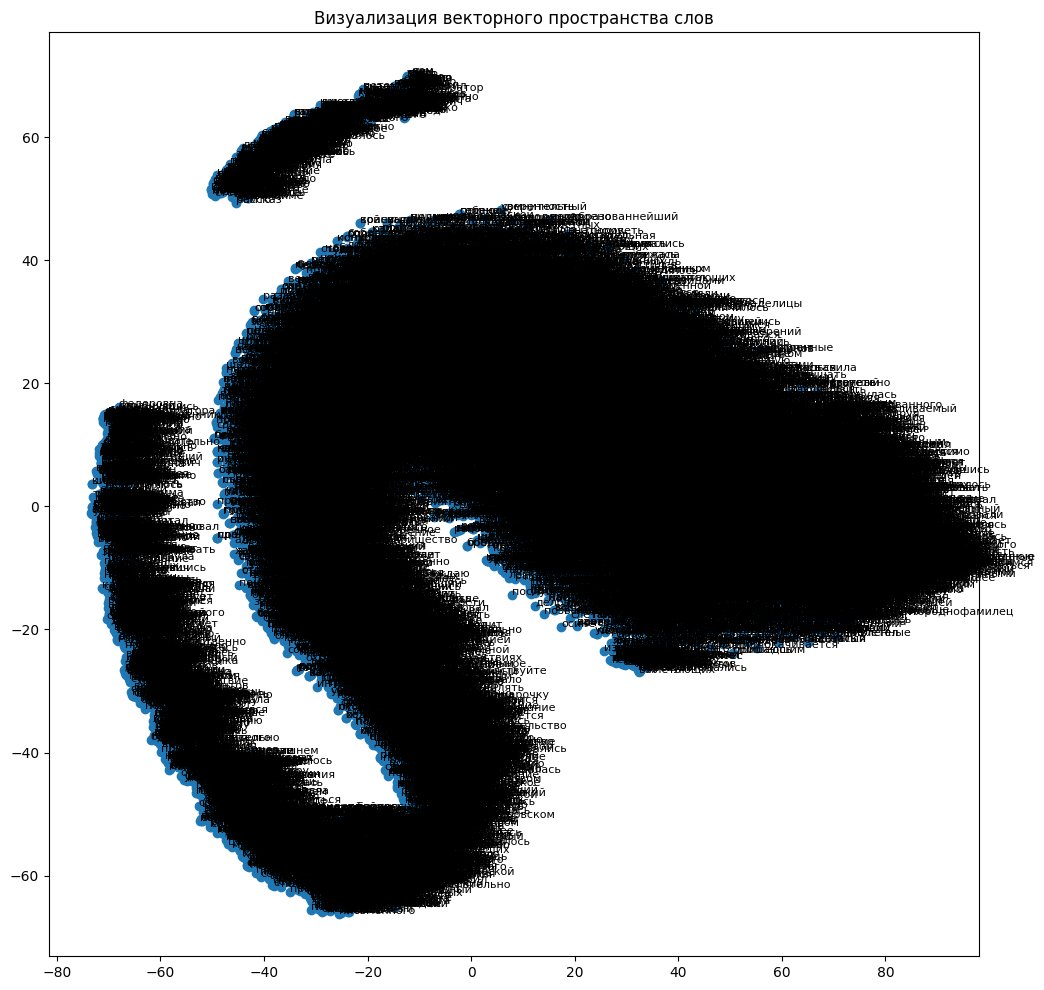

In [27]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

def visualize_words(model):
    words = list(model.wv.key_to_index.keys())
    word_vectors = model.wv[words]
    
    tsne = TSNE(n_components=2)
    reduced = tsne.fit_transform(word_vectors)
    
    df = pd.DataFrame(reduced, index=words, columns=['x', 'y'])
    plt.figure(figsize=(12, 12))
    plt.scatter(df['x'], df['y'])
    
    for word, pos in df.iterrows():
        plt.annotate(word, pos, fontsize=8)
    
    plt.title('Визуализация векторного пространства слов')
    plt.show()

    return reduced
reduced_vectors = visualize_words(model)

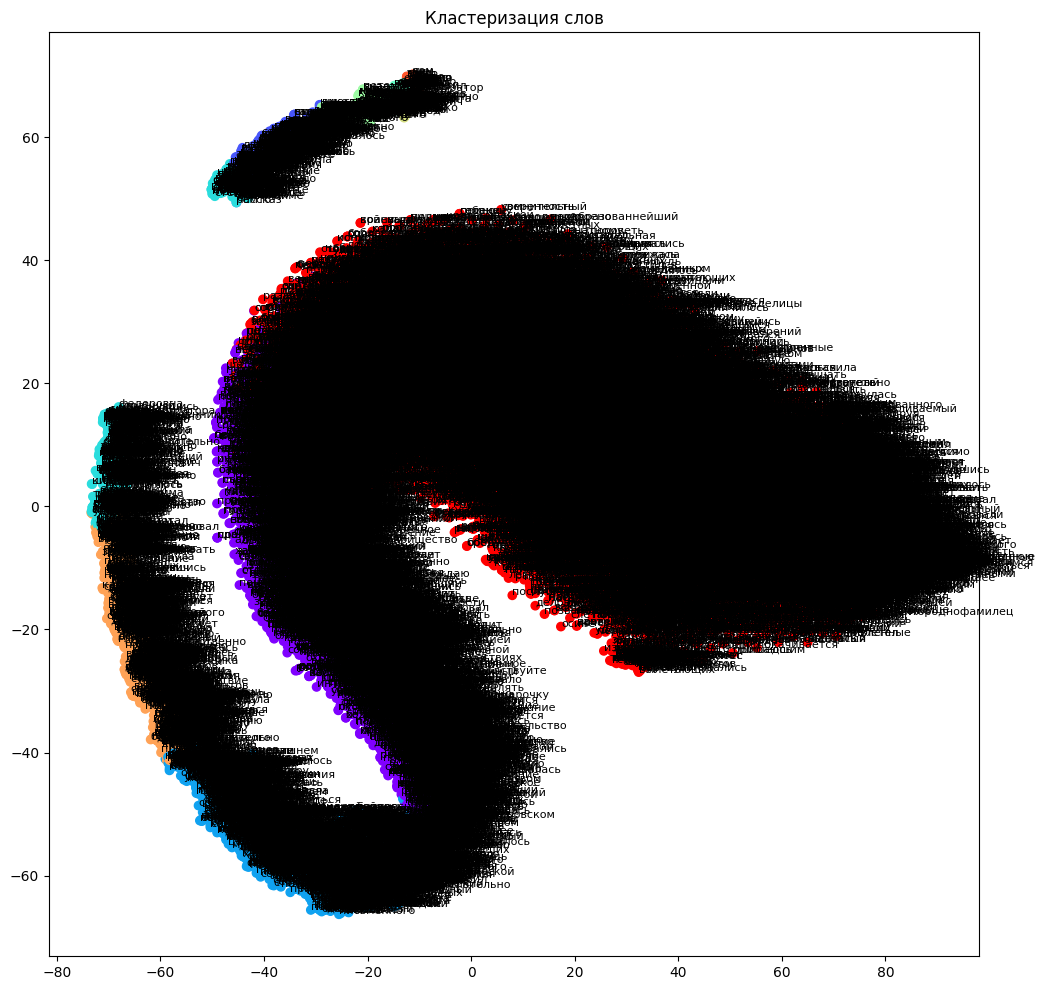

In [28]:
from sklearn.cluster import KMeans

num_clusters = 10 
word_vectors = model.wv[model.wv.key_to_index.keys()]

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(word_vectors)


labels = kmeans.labels_
plt.figure(figsize=(12, 12))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='rainbow')

for i, word in enumerate(model.wv.key_to_index.keys()):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=8)

plt.title('Кластеризация слов')
plt.show()